# Ecommerce Analysis

#### Author : Nicodemus Naisau (demsroadmap@gmail.com)

<a href="https://medium.com/@nicodemusnaisau/ecommerce-analytics-df427308bcd" target=_blank>
<img src="img/banner.jpg"
     alt="ecommerce img assets"
     style="float: center" /></a>

____

## Import Liblary

In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from matplotlib.gridspec import GridSpec
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
import colorlover as cl 

from pathlib import Path
from datetime import date

import warnings
warnings.filterwarnings("ignore") 

## Read Dataset

In [2]:
#connection
import sqlite3
con = sqlite3.connect("../olist.db")

In [3]:
cursor = con.cursor()
#query get name tables from database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

#show data table

print(cursor.fetchall())

[('olist_order_customer_dataset',), ('olist_order_dataset',), ('olist_order_reviews_dataset',), ('olist_order_payments_dataset',), ('olist_order_items_dataset',), ('olist_products_dataset',), ('olist_sellers_dataset',), ('olist_geolocation_dataset',), ('product_category_name_translation',)]


In [4]:
#read_data
order_customer = pd.read_sql("SELECT * from olist_order_customer_dataset", con)
order = pd.read_sql("SELECT * from olist_order_dataset", con)
order_reviews = pd.read_sql("SELECT * from olist_order_reviews_dataset", con)
order_payments = pd.read_sql("SELECT * from olist_order_payments_dataset", con)
order_items = pd.read_sql("SELECT * from olist_order_items_dataset", con)
products = pd.read_sql("SELECT * from olist_products_dataset", con)
sellers = pd.read_sql("SELECT * from olist_sellers_dataset", con)
geolocation = pd.read_sql("SELECT * from olist_geolocation_dataset", con)
product_category_translate = pd.read_sql("SELECT * from product_category_name_translation", con)

____

## Cleaning Data

### Missing Value

In [5]:
order_customer.isna().sum() 
order.isna().sum() # missing value
order_reviews.isna().sum() #missing value
order_payments.isna().sum()
order_items.isna().sum()
products.isna().sum() #missing value
sellers.isna().sum()
geolocation.isna().sum()
product_category_translate.isna().sum()

index                            0
product_category_name            0
product_category_name_english    0
dtype: int64

After checking each table column, it was found that there were 3 tables with a null value, such as the order table, product table, and review table.

products.isna().sum() #missing value <br>
order_reviews.isna().sum() #missing value<br>
order.isna().sum() # missing value<br>

#### Order Table

In [6]:
order.isna().sum()

index                               0
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [7]:
#handling NaN
order.dropna(inplace=True)

In [8]:
order.isna().sum()

index                            0
order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

#### Order Reviews Table

In [9]:
order_reviews.isna().sum()

index                          0
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

we don't need to drop data reviews that contain missing values, because from the order reviews sometimes people don't fill the review completely

#### Products Table

In [10]:
products.isna().sum()

index                           0
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [11]:
#handling NaN
products.dropna(inplace=True)

In [12]:
products.isna().sum()

index                         0
product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

## Identify Duplicate Data & Inconsistency Format

### Identify Duplicate Data

In [13]:
order_customer[order_customer.duplicated(keep='first')] 
order[order.duplicated(keep='first')]
order_reviews[order_reviews.duplicated(keep='first')] 
order_payments[order_payments.duplicated(keep='first')]
order_items[order_items.duplicated(keep='first')]
products[products.duplicated(keep='first')]
sellers[sellers.duplicated(keep='first')]
geolocation[geolocation.duplicated(keep='first')]
product_category_translate[product_category_translate.duplicated(keep='first')]

,index,product_category_name,product_category_name_english


After checking on each table, it does not find duplicate values.

### Inconsistency Format

In [14]:
#checking the table where is datetimes values
order_customer
order #date
order_reviews #date
order_payments
order_items #date
products
sellers
geolocation
product_category_translate

,index,product_category_name,product_category_name_english
0,0,beleza_saude,health_beauty
1,1,informatica_acessorios,computers_accessories
2,2,automotivo,auto
3,3,cama_mesa_banho,bed_bath_table
4,4,moveis_decoracao,furniture_decor
...,...,...,...
66,66,flores,flowers
67,67,artes_e_artesanato,arts_and_craftmanship
68,68,fraldas_higiene,diapers_and_hygiene
69,69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


**some tables contains data which has timestamp values ​​but is has object data type, so we need to change the data type.**<br>
order #date<br>
order_reviews #date<br>
order_items #date<br>

#### Order

In [15]:
order.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96461 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   index                          96461 non-null  int64 
 1   order_id                       96461 non-null  object
 2   customer_id                    96461 non-null  object
 3   order_status                   96461 non-null  object
 4   order_purchase_timestamp       96461 non-null  object
 5   order_approved_at              96461 non-null  object
 6   order_delivered_carrier_date   96461 non-null  object
 7   order_delivered_customer_date  96461 non-null  object
 8   order_estimated_delivery_date  96461 non-null  object
dtypes: int64(1), object(8)
memory usage: 7.4+ MB


In [16]:
#looping for changing dateimes type
for datetimes in ['order_purchase_timestamp',
                'order_approved_at',
                'order_delivered_carrier_date',
                'order_delivered_customer_date',
                'order_estimated_delivery_date']:
    order[datetimes] = pd.to_datetime(order[datetimes], errors='raise',utc=False)

In [17]:
order.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96461 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   index                          96461 non-null  int64         
 1   order_id                       96461 non-null  object        
 2   customer_id                    96461 non-null  object        
 3   order_status                   96461 non-null  object        
 4   order_purchase_timestamp       96461 non-null  datetime64[ns]
 5   order_approved_at              96461 non-null  datetime64[ns]
 6   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 7   order_delivered_customer_date  96461 non-null  datetime64[ns]
 8   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), int64(1), object(3)
memory usage: 7.4+ MB


#### Order Review

In [18]:
order_reviews.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   index                    99224 non-null  int64 
 1   review_id                99224 non-null  object
 2   order_id                 99224 non-null  object
 3   review_score             99224 non-null  int64 
 4   review_comment_title     11568 non-null  object
 5   review_comment_message   40977 non-null  object
 6   review_creation_date     99224 non-null  object
 7   review_answer_timestamp  99224 non-null  object
dtypes: int64(2), object(6)
memory usage: 6.1+ MB


In [19]:
for datetimes in ['review_creation_date','review_answer_timestamp']:
    order_reviews[datetimes] = pd.to_datetime(order_reviews[datetimes], errors='raise',utc=False)

In [20]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   index                    99224 non-null  int64         
 1   review_id                99224 non-null  object        
 2   order_id                 99224 non-null  object        
 3   review_score             99224 non-null  int64         
 4   review_comment_title     11568 non-null  object        
 5   review_comment_message   40977 non-null  object        
 6   review_creation_date     99224 non-null  datetime64[ns]
 7   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 6.1+ MB


#### Order Items

In [21]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   index                112650 non-null  int64  
 1   order_id             112650 non-null  object 
 2   order_item_id        112650 non-null  int64  
 3   product_id           112650 non-null  object 
 4   seller_id            112650 non-null  object 
 5   shipping_limit_date  112650 non-null  object 
 6   price                112650 non-null  float64
 7   freight_value        112650 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 6.9+ MB


In [22]:
order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'], errors='raise',utc=False)

In [23]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   index                112650 non-null  int64         
 1   order_id             112650 non-null  object        
 2   order_item_id        112650 non-null  int64         
 3   product_id           112650 non-null  object        
 4   seller_id            112650 non-null  object        
 5   shipping_limit_date  112650 non-null  datetime64[ns]
 6   price                112650 non-null  float64       
 7   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 6.9+ MB


the data format is suitable with the appropriate data type and the value of the attribute data itself.

___

# Handling Outliers

#### Order Payments

[Text(0.5, 1.0, 'Outlier Into Median')]

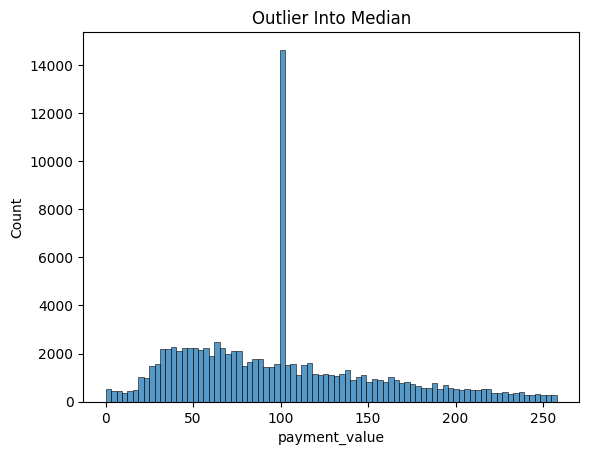

In [24]:
# changing outliers values into median

# identify quartile
q1 = order_payments["payment_value"].quantile(q=0.25) * 1.5
q3 = order_payments["payment_value"].quantile(q=0.75) * 1.5
# select the data where is < q1

order_payments_without_outlier = order_payments[order_payments["payment_value"] < q1]
median = order_payments["payment_value"].median()

# changking values into median where the data more than value q3
order_payments.loc[order_payments["payment_value"] > q3, "payment_value"]= median

sns.histplot(order_payments["payment_value"]).set(title='Outlier Into Median')

## Exploratory Data Anlaysis

### Define Tables

In [25]:
order_customer
order 
order_reviews 
order_payments
order_items 
products
sellers
geolocation
product_category_translate

,index,product_category_name,product_category_name_english
0,0,beleza_saude,health_beauty
1,1,informatica_acessorios,computers_accessories
2,2,automotivo,auto
3,3,cama_mesa_banho,bed_bath_table
4,4,moveis_decoracao,furniture_decor
...,...,...,...
66,66,flores,flowers
67,67,artes_e_artesanato,arts_and_craftmanship
68,68,fraldas_higiene,diapers_and_hygiene
69,69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


## Product Analysis

Product Categories Most Popular

In [26]:
#join table
products

,index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...,...
32946,32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [27]:
#jointable
products = pd.merge(products, product_category_translate, on='product_category_name')
products.drop(columns='product_category_name', inplace=True)

#rename columns
products.rename(columns={'product_category_name_english': 'product_category'}, inplace=True)

In [28]:
#jointable
product_most_bought=pd.merge(order_items,products,on='product_id',how='left')

#aggreagtion count every order_id
product_most_bought = product_most_bought.groupby('product_category').aggregate({'order_id':'count'}).rename(columns={'order_id':'order_count'}).sort_values(by='order_count',ascending=False).reset_index()

#product category most bought
product_most_bought.head(10).style.background_gradient(cmap='Blues')

,product_category,order_count
0,bed_bath_table,11115
1,health_beauty,9670
2,sports_leisure,8641
3,furniture_decor,8334
4,computers_accessories,7827
5,housewares,6964
6,watches_gifts,5991
7,telephony,4545
8,garden_tools,4347
9,auto,4235


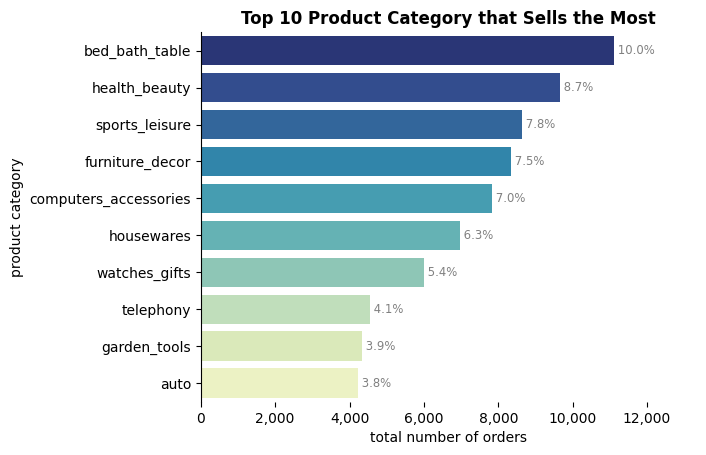

In [29]:
### Visualising top 10 most bought product categories:

ax = sns.barplot(x='order_count',y='product_category',data=product_most_bought[:10],palette="YlGnBu_r")
plt.ylabel("product category")
plt.xlabel("total number of orders")
plt.xticks(rotation='horizontal')
total = product_most_bought['order_count'].sum()

#comma formatter
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

#percantage
for c in ax.containers:
        labels = [f" {(value.get_width() / total):.1%}" for value in c]
        ax.bar_label(c, labels=labels, label_type="edge",fontsize='smaller', fontname='Sans',color='grey')    


for spine in ['top', 'right','bottom']:
    ax.spines[spine].set_visible(False)
    
ax.set_title(
        "Top 10 Product Category that Sells the Most",
        fontdict={"fontweight": "bold"},
    )

ax.set(
        xlim=(None, product_most_bought["order_count"].max() * 1.2)
    )  # gives room for the annotations

plt.savefig(
        Path(".") / "plots" / f"most_bought_products.png",
        bbox_inches="tight",
        dpi=200,
    )
plt.show()

In [30]:
#product lowest bought 
product_most_bought.tail(10).style.background_gradient(cmap='Blues')

,product_category,order_count
61,furniture_mattress_and_upholstery,38
62,music,38
63,flowers,33
64,fashion_sport,30
65,home_comfort_2,30
66,arts_and_craftmanship,24
67,la_cuisine,14
68,cds_dvds_musicals,14
69,fashion_childrens_clothes,8
70,security_and_services,2


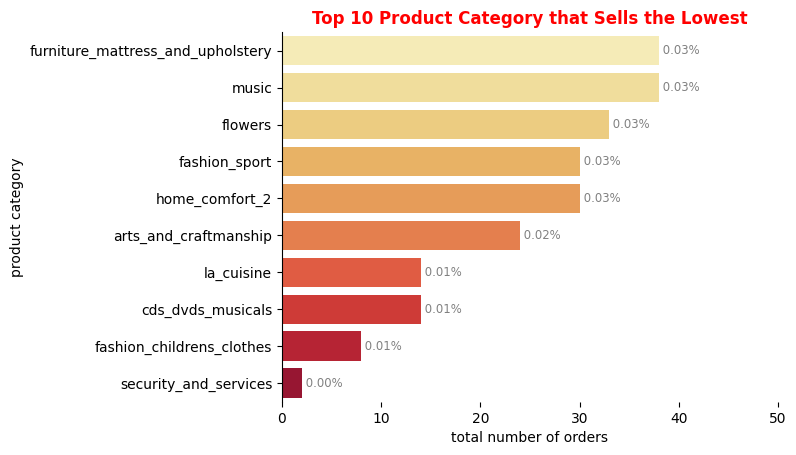

In [31]:
### Visualising top 10 lowest bought product categories:
ax = sns.barplot(x='order_count',y='product_category',data=product_most_bought[61:71],palette="YlOrRd")
plt.ylabel("product category")
plt.xlabel("total number of orders")
plt.xticks(rotation='horizontal')
total = product_most_bought['order_count'].sum()
#formmater comma
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
#percantage
for c in ax.containers:
        labels = [f" {(value.get_width() / total):.2%}" for value in c]
        ax.bar_label(c, labels=labels, label_type="edge",fontsize='smaller', fontname='Sans',color='grey')    


for spine in ['top', 'right','bottom']:
    ax.spines[spine].set_visible(False)
    
ax.set_title(
        "Top 10 Product Category that Sells the Lowest",
        fontdict={"fontweight": "bold"},
        color='red'
    )
plt.savefig(
        Path(".") / "plots" / f"lowest_bought_products.png",
        bbox_inches="tight",
        dpi=200,
    )
ax.set(
        xlim=(None, 50)
    )  # gives room for the annotations
plt.show()

## Sales

### Time series Order

In [32]:
#get date purhcase
order['order_purchase_date'] = pd.to_datetime(order['order_purchase_timestamp']).dt.date
order['day_name'] = pd.to_datetime(order['order_purchase_timestamp']).dt.day_name()

In [33]:
#aggregate count every date how much order 
order_count = order.groupby(['order_purchase_date','day_name'])[['order_id']].count().rename(columns={'order_id':'total_order'}).reset_index()

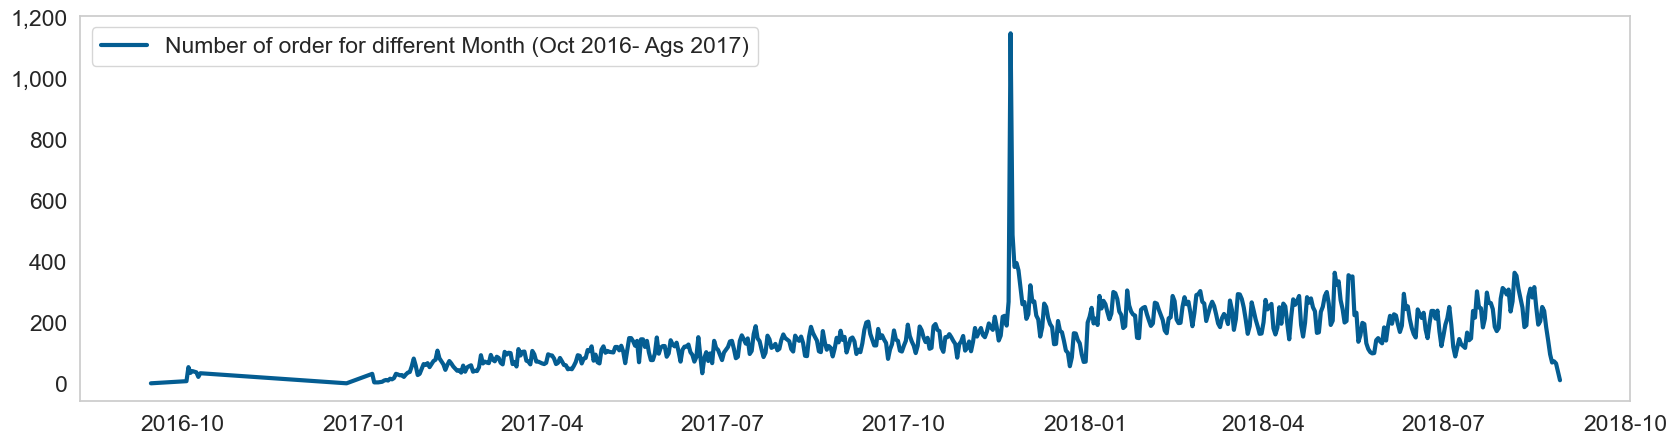

In [34]:
### Visualising time-series number of order 
sns.set(style = 'whitegrid', font_scale = 1.5)
sns.set_palette('PuBu_r')
fig, axes = plt.subplots(figsize=(20,5))
plt.plot(order_count['order_purchase_date'], order_count['total_order'], label = 'Number of order for different Month (Oct 2016- Ags 2017)', linewidth = 3)
axes.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
axes.grid()

plt.savefig(
        Path(".") / "plots" / f"time_series_sales.png",
        bbox_inches="tight",
        dpi=200,
    )

plt.legend()

spike in transactions in 2017 lets see it details

In [35]:
order['purchase_month_date'] = order['order_purchase_timestamp'].astype(str).str.slice(0, 7)
order_in_2017 = order.groupby('purchase_month_date')[['order_id']].count().rename(columns={'order_id':'total_order'}).reset_index()
order_in_2017['purchase_month_date'] = order_in_2017['purchase_month_date'].astype('datetime64[ns]')
order_in_2017 = order_in_2017[(order_in_2017['purchase_month_date'] >= '2017-01-01') & (order_in_2017['purchase_month_date'] < '2018-01-01')]

In [36]:
order_in_2017.style.background_gradient(cmap='Blues')

,purchase_month_date,total_order
3,2017-01-01 00:00:00,748
4,2017-02-01 00:00:00,1641
5,2017-03-01 00:00:00,2546
6,2017-04-01 00:00:00,2303
7,2017-05-01 00:00:00,3545
8,2017-06-01 00:00:00,3135
9,2017-07-01 00:00:00,3872
10,2017-08-01 00:00:00,4193
11,2017-09-01 00:00:00,4149
12,2017-10-01 00:00:00,4478


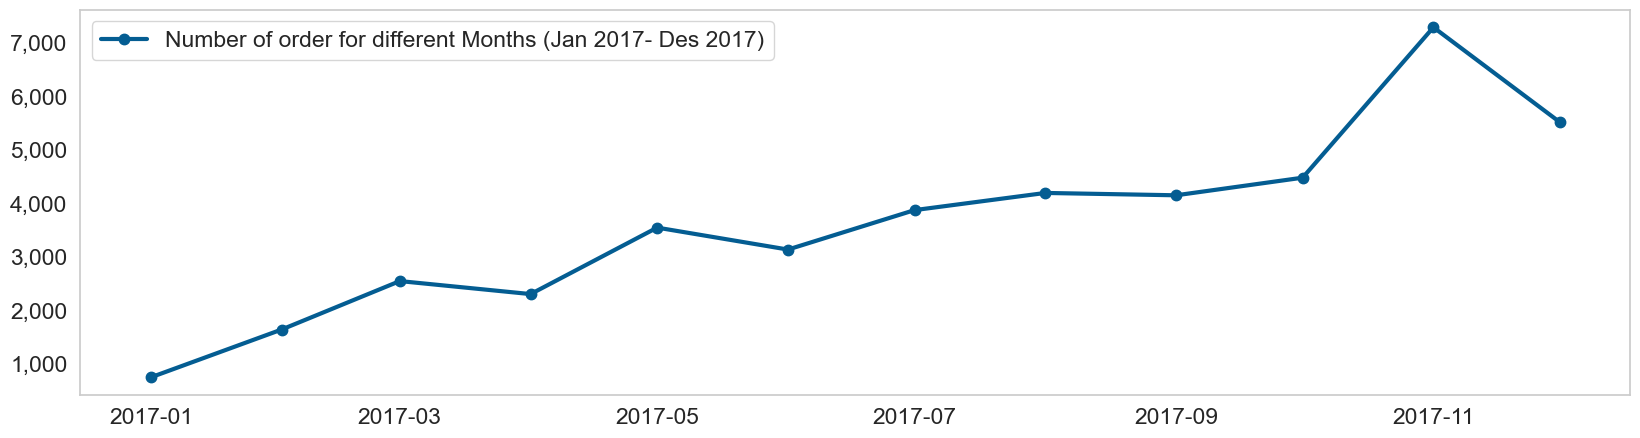

In [37]:
### Visualising time-series number of order (jan 17 - des 17)
sns.set(style = 'whitegrid', font_scale = 1.5)
sns.set_palette('PuBu_r')
fig, axes = plt.subplots(figsize=(20,5))
plt.plot(order_in_2017['purchase_month_date'], order_in_2017['total_order'], 
         label = 'Number of order for different Months (Jan 2017- Des 2017)', marker = '.', markersize = 15, linewidth = 3)

#formatter comma
axes.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
axes.grid()


plt.savefig(
        Path(".") / "plots" / f"time_series_sales_2017.png",
        bbox_inches="tight",
        dpi=200,
    )

plt.legend()

it can be seen that november reached 7000 orders. what happened???

lets checkout on nov 2017

<img src="https://media.makeameme.org/created/what-is-happening-5c6d40.jpg"
     alt="Markdown Monster icon"
     style="float: center" />

In [38]:
order_count['order_purchase_date']= pd.to_datetime(order_count['order_purchase_date']).astype('datetime64[ns]')
order_count_nov_17 = order_count[(order_count['order_purchase_date'] >= '2017-01-01') & (order_count['order_purchase_date']<'2017-11-30')]
order_count_nov_17.sort_values(by='total_order', ascending=False).head(10).style.background_gradient(cmap='Blues')

,order_purchase_date,day_name,total_order
333,2017-11-24 00:00:00,Friday,1147
334,2017-11-25 00:00:00,Saturday,487
336,2017-11-27 00:00:00,Monday,395
335,2017-11-26 00:00:00,Sunday,382
337,2017-11-28 00:00:00,Tuesday,371
338,2017-11-29 00:00:00,Wednesday,314
332,2017-11-23 00:00:00,Thursday,268
330,2017-11-21 00:00:00,Tuesday,222
329,2017-11-20 00:00:00,Monday,219
325,2017-11-16 00:00:00,Thursday,219


<img src="img/black_friday.png"
     alt="news about black friday"
     style="float: center" />

aaa i see because of public enthusiasm for the black friday event, it causes a spike in transactions.

## Customer

### Payment Method

In [39]:
order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96461 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   index                          96461 non-null  int64         
 1   order_id                       96461 non-null  object        
 2   customer_id                    96461 non-null  object        
 3   order_status                   96461 non-null  object        
 4   order_purchase_timestamp       96461 non-null  datetime64[ns]
 5   order_approved_at              96461 non-null  datetime64[ns]
 6   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 7   order_delivered_customer_date  96461 non-null  datetime64[ns]
 8   order_estimated_delivery_date  96461 non-null  datetime64[ns]
 9   order_purchase_date            96461 non-null  object        
 10  day_name                       96461 non-null  object        
 11  purchase_month_

In [40]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   index                 103886 non-null  int64  
 1   order_id              103886 non-null  object 
 2   payment_sequential    103886 non-null  int64  
 3   payment_type          103886 non-null  object 
 4   payment_installments  103886 non-null  int64  
 5   payment_value         103886 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 4.8+ MB


In [41]:
#join table order and payment 
orders_payments_method = pd.merge(order, order_payments, on= 'order_id', how ='left')

In [42]:
orders_payments_method = orders_payments_method[(orders_payments_method['order_purchase_date'] >= datetime.date(2017,1,1)) & (orders_payments_method['order_purchase_date'] < datetime.date(2018,1,1))]
orders_payments_method = orders_payments_method.groupby(['purchase_month_date', 'payment_type'])[['order_id']].count().reset_index()
orders_payments_method = pd.pivot_table(orders_payments_method, index = 'purchase_month_date', columns = 'payment_type', values = 'order_id', aggfunc = sum).fillna(0)

In [43]:
orders_payments_method.style.background_gradient(cmap='Blues')

payment_type,boleto,credit_card,debit_card,voucher
purchase_month_date,,,,
2017-01,186,542,9,60
2017-02,359,1257,13,108
2017-03,565,1908,30,197
2017-04,474,1772,25,165
2017-05,740,2732,29,285
2017-06,689,2373,26,235
2017-07,811,2974,20,342
2017-08,902,3186,33,272
2017-09,868,3182,43,277


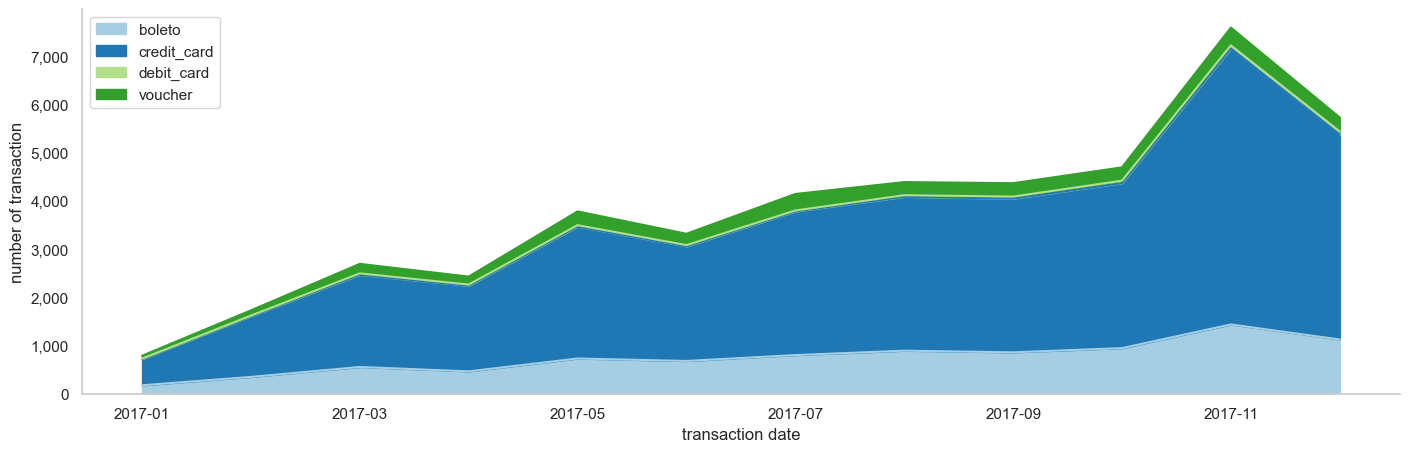

In [44]:
sns.set(style = 'whitegrid')
sns.set_palette('Paired')
ax.grid(False)
axes = orders_payments_method.plot.area(figsize=(17,5))
#remove line 
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_xlabel('transaction date')
axes.set_ylabel('number of transaction')
#formater coma
axes.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.savefig(
        Path(".") / "plots" / f"payment_method.png",
        bbox_inches="tight",
        dpi=200,
    )

axes.grid()
plt.legend()

In [45]:
# join tables
order_customer_data = pd.merge(order, order_customer, on= 'customer_id', how ='left')
order_customer_data = pd.merge(order_customer_data, order_payments, on= 'order_id', how ='inner')

In [46]:
#aggregation payment type
count_payment = order_payments['payment_type'].value_counts().reset_index().sort_values(by='payment_type', ascending=False)

#aggregation value payment each order_id
sum_value_payment = order_payments.groupby('payment_type')['payment_value'].sum().reset_index().sort_values(by='payment_value', ascending=False)

#select columns
order_customer_data = order_customer_data[['payment_type','payment_value','customer_state','order_id']]
order_customer_data

,payment_type,payment_value,customer_state,order_id
0,credit_card,18.12,SP,e481f51cbdc54678b7cc49136f2d6af7
1,voucher,2.00,SP,e481f51cbdc54678b7cc49136f2d6af7
2,voucher,18.59,SP,e481f51cbdc54678b7cc49136f2d6af7
3,boleto,141.46,BA,53cdb2fc8bc7dce0b6741e2150273451
4,credit_card,179.12,GO,47770eb9100c2d0c44946d9cf07ec65d
...,...,...,...,...
100734,credit_card,85.08,SP,9c5dedf39a927c1b2549525ed64a053c
100735,credit_card,195.00,SP,63943bddc261676b46f01ca7ac2f7bd8
100736,credit_card,100.00,BA,83c1379a015df1e13d02aae0204711ab
100737,credit_card,100.00,RJ,11c177c8e97725db2631073c19f07b62


In [47]:
# create pivot table
heatmap = order_customer_data.pivot_table(values='payment_value', index=['customer_state'], columns=['payment_type'], aggfunc='sum', fill_value=0, margins=True) #fill_value mengisi nilai NaN, margins untuk menjumlahkan total
heatmap.style.background_gradient(cmap='Blues')

payment_type,boleto,credit_card,debit_card,voucher,All
customer_state,,,,,
AC,1670.420000,7209.810000,349.620000,339.430000,9569.280000
AL,7639.090000,38042.090000,305.360000,924.810000,46911.350000
AM,2355.680000,13615.950000,152.020000,210.820000,16334.470000
AP,2258.270000,5907.120000,0.000000,237.420000,8402.810000
BA,60304.690000,281004.170000,5685.130000,13247.980000,360241.970000
CE,21364.150000,117408.650000,2551.030000,5083.120000,146406.950000
DF,36727.270000,178742.060000,1661.410000,5210.590000,222341.330000
ES,38390.970000,167485.070000,2305.420000,6416.690000,214598.150000
GO,45171.260000,158382.300000,2527.790000,5506.870000,211588.220000


### Location State Customer

In [48]:
#join table
customer_state = pd.merge(order_customer, order, on =  'customer_id')
#aggregation order_id based on customer_state
customer_state= customer_state.groupby('customer_state').aggregate({'order_id':'count'}).rename(columns={'order_id':'order_count'}).sort_values(by='order_count',ascending=False).reset_index()
#heatmaps
customer_state.style.background_gradient(cmap='Blues')

,customer_state,order_count
0,SP,40489
1,RJ,12351
2,MG,11352
3,RS,5342
4,PR,4923
5,SC,3547
6,BA,3256
7,DF,2080
8,ES,1995
9,GO,1957


In [49]:
geoplocation_city = geolocation.groupby('geolocation_state')['geolocation_city'].nunique().reset_index()
geoplocation_city.rename(columns={'geolocation_state': 'customer_state','geolocation_city':'gelocation_city_count'}, inplace=True)
geoplocation_city.sort_values(by = 'gelocation_city_count', ascending= False)
geoplocation_city.style.background_gradient(cmap='Blues')

,customer_state,gelocation_city_count
0,AC,34
1,AL,130
2,AM,74
3,AP,17
4,BA,652
5,CE,260
6,DF,28
7,ES,160
8,GO,384
9,MA,299


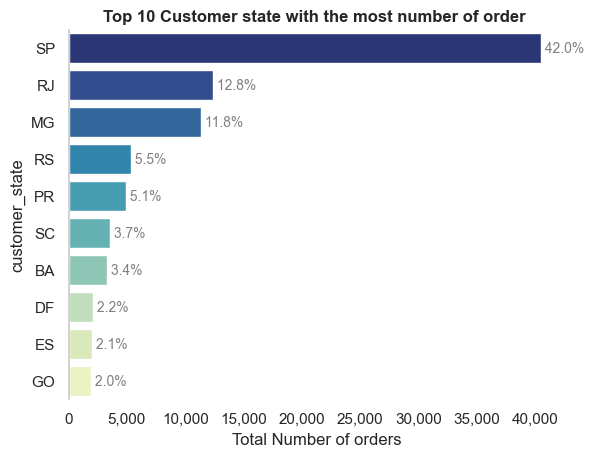

In [50]:
### Visualising top 10 most bought product categories from customer_state:

ax = sns.barplot(x='order_count',y='customer_state',data=customer_state[:10],palette="YlGnBu_r")
ax.grid(False)
plt.xlabel("Total Number of orders")
plt.ylabel("customer_state")
plt.title("Most bought from customer state")

#get total from order_count
total = customer_state['order_count'].sum()

ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

#percantage
for c in ax.containers:
        labels = [f" {(value.get_width() / total):.1%}" for value in c]
        ax.bar_label(c, labels=labels, label_type="edge",fontsize='smaller', fontname='Sans',color='grey')    

for spine in ['top', 'right','bottom']:
    ax.spines[spine].set_visible(False)
    
ax.set_title(
        "Top 10 Customer state with the most number of order ",
        fontdict={"fontweight": "bold"},
    )

plt.savefig(
        Path(".") / "plots" / f"state_with_most_order.png",
        bbox_inches="tight",
        dpi=200,
    )

plt.show()


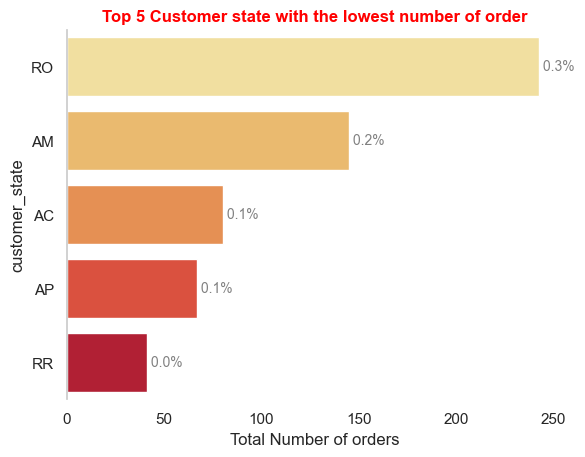

In [51]:
### Visualising top 5 lowest bought product categories from order:
ax = sns.barplot(x='order_count',y='customer_state',data=customer_state[22:],palette="YlOrRd")
ax.grid(False)
plt.xlabel("Total Number of orders")
plt.ylabel("customer_state")
plt.title("Most bought from customer state")
plt.xticks(rotation='horizontal')
total = customer_state['order_count'].sum()
ax.grid(False)
#percantage
for c in ax.containers:
        labels = [f" {(value.get_width() / total):.1%}" for value in c]
        ax.bar_label(c, labels=labels, label_type="edge",fontsize='smaller', fontname='Sans',color='grey')    

for spine in ['top', 'right','bottom']:
    ax.spines[spine].set_visible(False)
    
ax.set_title(
        "Top 5 Customer state with the lowest number of order",
        fontdict={"fontweight": "bold"},
        color="red"
    )
plt.savefig(
        Path(".") / "plots" / f"state_with_lowest_order.png",
        bbox_inches="tight",
        dpi=200,
    )

plt.show()


#### Correlation between the number of cities in each state with the total transactions

In [52]:
customer_state_order = pd.merge(customer_state,geoplocation_city, on='customer_state')
customer_state_order[['order_count','gelocation_city_count']].corr()

,order_count,gelocation_city_count
order_count,1.000000,0.656747
gelocation_city_count,0.656747,1.000000


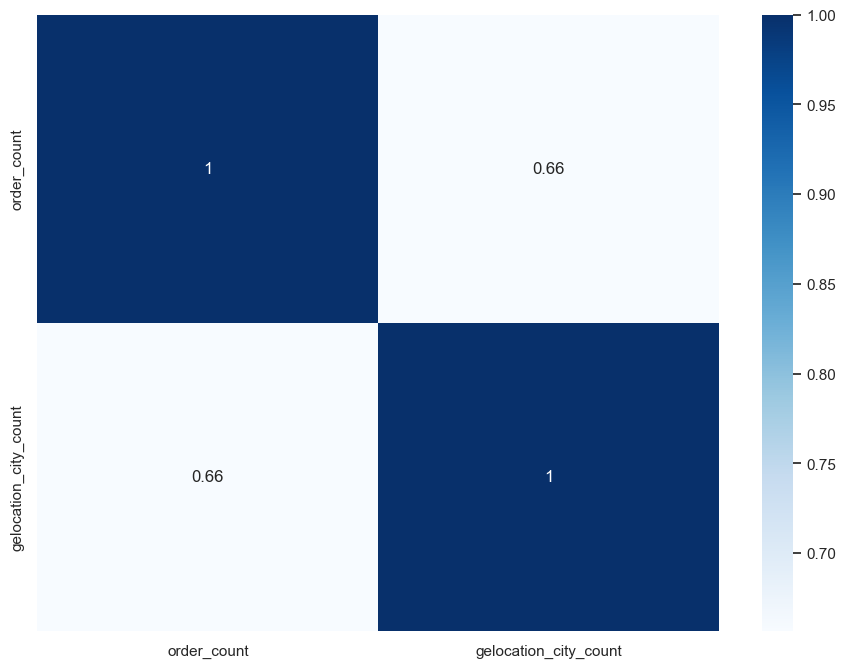

In [53]:
corr = customer_state_order.corr()
# corr.style.background_gradient(cmap='Greens')
plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="Blues",annot=True)
plt.savefig(
        Path(".") / "plots" / f"correlation_state_order.png",
        bbox_inches="tight",
        dpi=200,
    )
plt.show()

It was found that correlation 1 is a correlation with the variable itself while the correlation value of 0.66 indicates the correlation between variables.

# Read More on [Medium](https://medium.com/@nicodemusnaisau/ecommerce-analytics-df427308bcd)